<a href="https://colab.research.google.com/github/DonRoboto/MOO_v1/blob/main/T2_P1_Filtrado_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import io
import random
import math
import numpy as np
import scipy, pylab
import matplotlib.pyplot as plt

In [2]:
#cargar archivos de pesos
url = 'https://raw.githubusercontent.com/DonRoboto/MOO_v1/main/knap_250.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

data = df.columns

n_1 = int(float(str(data[0])))
max_cap_1 = float(str(data[1]))
n_2 = int(float(str(data[2])))
max_cap_2 = float(str(data[3]))

print(n_1)
print(max_cap_1)
print(n_2)
print(max_cap_2)

250
6536.0
250
6489.0


In [3]:
profit_1=df.iloc[:, 0]
weight_1=df.iloc[:, 1]

profit_2=df.iloc[:, 2]
weight_2=df.iloc[:, 3]

In [4]:
#crear pesos
pesos_1 = [i/10 for i in range(0, 11)]
pesos_2=[]

for i in range(len(pesos_1)):
  pesos_2.append(round(1-pesos_1[i],2))


In [5]:
for i in range(len(pesos_1)):
  print(pesos_1[i])
  print(pesos_2[i])

0.0
1.0
0.1
0.9
0.2
0.8
0.3
0.7
0.4
0.6
0.5
0.5
0.6
0.4
0.7
0.3
0.8
0.2
0.9
0.1
1.0
0.0


In [6]:
class Individuo():
        
    def __init__(self, items_1='', items_2='', n_items_1='', n_items_2='', max_cap_1='', max_cap_2='', w1='', w2=''):
      self.items_1=[]
      self.items_2=[]

      self.n_items_1=n_items_1
      self.max_cap_1=max_cap_1

      self.n_items_2=n_items_2
      self.max_cap_2=max_cap_2

      self.w1=w1
      self.w2=w2

      if items_1!='':
        self.items_1=items_1
        self.items_2=items_2
      else:
        #cromosomas variables
        inx_c1 = random.randint(4, self.n_items_1)
        for i in range(inx_c1):
          pos_1 = random.randint(0, self.n_items_1-1)
          
          if pos_1 not in self.items_1:
            self.items_1.append(pos_1)

        inx_c2 = random.randint(4, self.n_items_2)
        for i in range(inx_c2):
          pos_2 = random.randint(0, self.n_items_2-1)
          
          if pos_2 not in self.items_2:
            self.items_2.append(pos_2)

      #no se debe exceder la capacidad (weight) máxima
      pes1, pes2 = self.pesos()
      while pes1>(self.max_cap_1*self.w1):
        self.items_1.pop()
        pes1, pes2 = self.pesos()

      pes1, pes2 = self.pesos()
      while pes2>(self.max_cap_2*self.w2):
        self.items_2.pop()
        pes1, pes2 = self.pesos()


    def pesos(self):      
      t_weight_1 = 0      
      t_weight_2 = 0

      for i in range(len(self.items_1)):                
        t_weight_1 = t_weight_1 + weight_1[self.items_1[i]]

      for j in range(len(self.items_2)):                
        t_weight_2 = t_weight_2 + weight_2[self.items_2[j]]
        
      return t_weight_1, t_weight_2   


    def profits(self):      
      t_profit_1 = 0      
      t_profit_2 = 0

      for i in range(len(self.items_1)):                
        t_profit_1 = t_profit_1 + profit_1[self.items_1[i]]

      for j in range(len(self.items_2)):                
        t_profit_2 = t_profit_2 + profit_2[self.items_2[j]]
        
      return t_profit_1, t_profit_2  


    def fittnes(self):
      t_profit_1 = 0
      t_weight_1 = 0
      
      t_profit_2 = 0
      t_weight_2 = 0

      t_weight_1, t_weight_2 = self.pesos()
      
      for i in range(len(self.items_1)):        
        t_profit_1 = t_profit_1 + profit_1[self.items_1[i]]

      for i in range(len(self.items_2)):        
        t_profit_2 = t_profit_2 + profit_2[self.items_2[i]]
        
      if (t_weight_1 + t_weight_2) > (max_cap_1 + max_cap_2):
        t_profit = 0
      else:
        t_profit = (t_profit_1 + t_profit_2)

      return t_profit      

In [7]:
fit = []

for i in range(100000):  
  rand_1 = random.randint(4, n_1)
  rand_2 = random.randint(4, n_2)

  peso_1 = round(random.uniform(0,1), 4)
  peso_2 = round(1 - peso_1, 4)

  ind = Individuo(items_1='',items_2='', n_items_1=rand_1, n_items_2=rand_2, max_cap_1=max_cap_1, max_cap_2=max_cap_2, w1=peso_1, w2=peso_2)

  f1, f2 = ind.profits()

  fit.append([f1, f2])

#print(fit)

In [8]:
dom = []

#fitrado
for i in range(len(fit)):
  x_1 = fit[i][0]
  y_1 = fit[i][1]

  ap = False

  for j in range(len(fit)):
    
    if i!= j:
      x_2 = fit[j][0]
      y_2 = fit[j][1]

      if (x_1<x_2) and (y_1<y_2):
        ap = False
        break
      else:
        ap=True

  if ap:
    dom.append(fit[i])


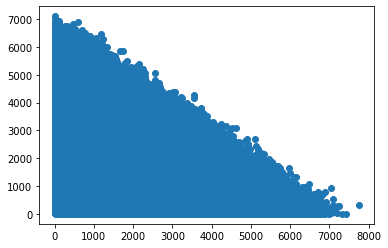

100000


In [9]:

graph_1=[]
graph_2=[]

for r in range(len(fit)):
  graph_1.append(fit[r][0])
  graph_2.append(fit[r][1])
  
plt.scatter(graph_1, graph_2)
plt.show()

print(len(fit))

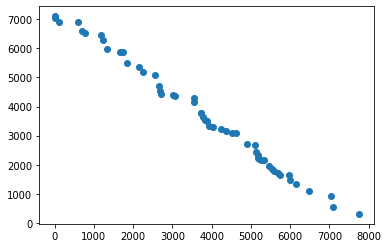

53


In [10]:

graph_1=[]
graph_2=[]

for r in range(len(dom)):
  graph_1.append(dom[r][0])
  graph_2.append(dom[r][1])
  
plt.scatter(graph_1, graph_2)
plt.show()

print(len(dom))